In [1]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import seaborn
import os

/home/vipin/.local/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
os.listdir()

['utils.py',
 '.ipynb_checkpoints',
 'train_test_split.csv',
 'Untitled.ipynb',
 'cats_dogs']

In [3]:
data_dir = './cats_dogs/cat_1.wav'

This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz.

In [4]:
x, sr = librosa.load(data_dir)

In [5]:
x

array([ 0.00381674,  0.00407222,  0.00156718, ..., -0.0146927 ,
       -0.01779636, -0.01206966], dtype=float32)

In [6]:
sr

22050

In [7]:
x1, sr1 = librosa.load(data_dir, sr=None)

In [8]:
sr1

16000

In [9]:
x1

array([ 0.00378418,  0.00326538,  0.00021362, ..., -0.01663208,
       -0.01507568, -0.0161438 ], dtype=float32)

In [11]:
import numpy as np
np.shape(x)

(246960,)

In [12]:
np.shape(x1)

(179200,)

The sample rate is the number of samples of audio carried per second, measured in Hz or kHz

Using,IPython.display.Audio you can play the audio in your jupyter notebook.

In [13]:
import IPython.display as ipd
ipd.Audio(data_dir)

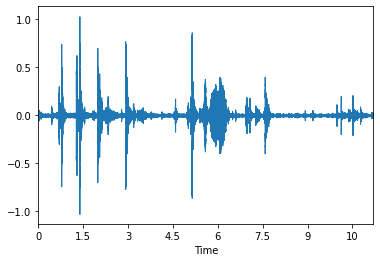

In [17]:
import librosa.display
librosa.display.waveplot(x, sr)
plt.show()

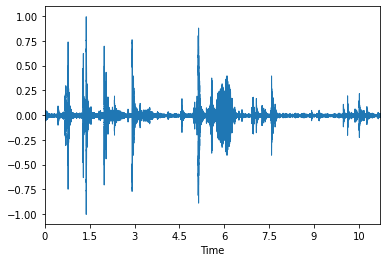

In [19]:
librosa.display.waveplot(x1, sr=sr1)
plt.show()

Spectrogram

 
A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

.stft() converts data into short term Fourier transform. STFT converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. .specshow is used to display a spectrogram.

In [21]:
X = librosa.stft(x)

In [24]:
np.shape(X)

(1025, 483)

In [26]:
Xdb = librosa.amplitude_to_db(abs(X))

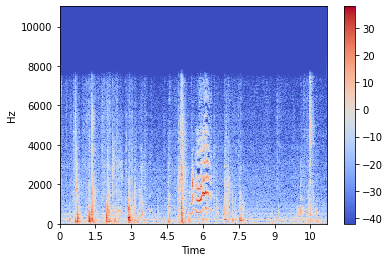

In [34]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

In [73]:
sr = 22050
T = 5.0
t = np.linspace(0, T,int(T*sr),endpoint=False)
x = 0.5*np.sin(np.pi*t*220*2)# pure sine wave at 220 Hz

ipd.Audio(x, rate=sr)


Feature extraction from Audio signal

 
Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study a few of the features in detail.

The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

1. Spectral Centroid

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:

where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.

librosa.feature.spectral_centroid computes the spectral centroid for each frame in a signal:

import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')


.spectral_centroid will return an array with columns equal to a number of frames present in your sample.

There is a rise in the spectral centroid in the beginning.

2. Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal:

spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')


3. Spectral Bandwidth

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

librosa.feature.spectral_bandwidth computes the order-p spectral bandwidth:

spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))


4. Zero-Crossing Rate

A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.

It usually has higher values for highly percussive sounds like those in metal and rock. Now let us visualize it and see how we calculate zero crossing rate.

x, sr = librosa.load('/../../gruesome.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()


Zooming in

n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()


There appear to be 16 zero crossings. Let’s verify it with Librosa.

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16


5. Mel-Frequency Cepstral Coefficients(MFCCs)

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


6. Chroma feature

A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.

librosa.feature.chroma_stft is used for the computation of Chroma features.

chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')


Now that we understood how we can play around with audio data and extract important features using python. In the following section, we are going to use these features and build a ANN model for music genre classification.

 